RatInABox Data Generator initialized:
Environment: 2.2m x 2.2m, boundary=solid
Timestep: 0.02s (50 Hz)
Place cells: 512 cells, cell width=0.2m, DoG=True
Mean speed: 0.100 m/s
Expected displacement/step: ~0.0020m


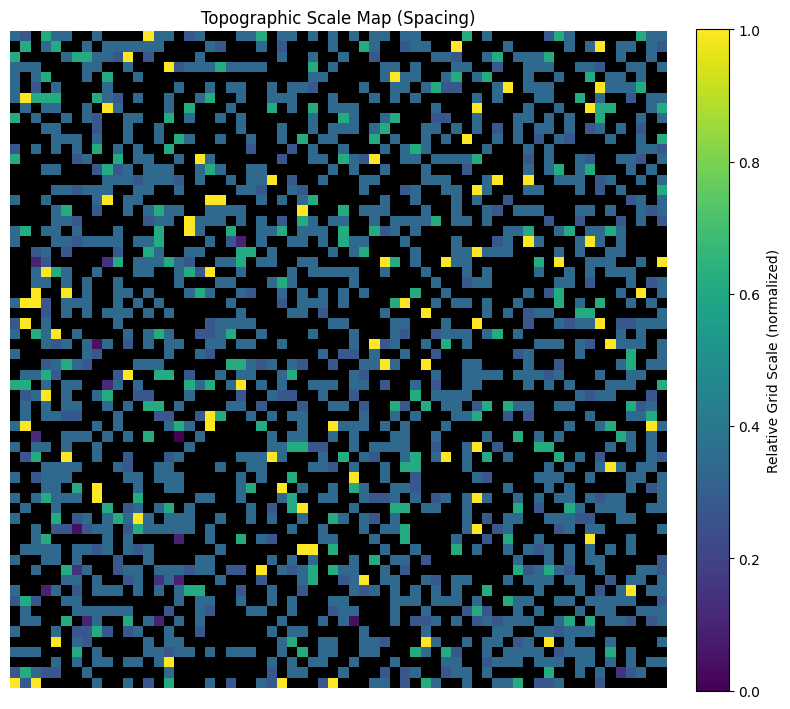

In [1]:
import os
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
from matplotlib.colors import hsv_to_rgb
import torch.nn.functional as F
from einops import rearrange

# Add parent directory to path
directory_path = os.path.abspath('../')
if directory_path not in sys.path:
    sys.path.append(directory_path)

from grid_network import GridNetwork

from matplotlib import cm
import matplotlib.colors as mcolors

from analyze import compute_grid_scores_from_model, create_topographic_scale_map_figure
from datagen import GridCellDataGenerator

model = GridNetwork(
    Np=512,
    Ng=4096,
    weight_decay=1e-4,
    activation='relu',
)

checkpoint = torch.load('../checkpoints/nontopo_01_20_26_1921/model_step_40000.pth', map_location='cpu')
model.load_state_dict(checkpoint['model_state_dict'])

data_gen = GridCellDataGenerator(
    n_place_cells=512,
    box_size=2.2,
    dt=0.02,
    place_cell_width=0.2,
    surround_scale=2,
    surround_amplitude=0.5,
    DoG=True,
    device='mps'
)

model.to('mps')

grid_scores, ratemaps = compute_grid_scores_from_model(
    model, data_gen, n_batches=50, batch_size=200, seq_length=20, res=32
)

scale_map_fig = create_topographic_scale_map_figure(ratemaps, grid_scores, mask_threshold=0.0, gscore_threshold=0.3)

plt.show()

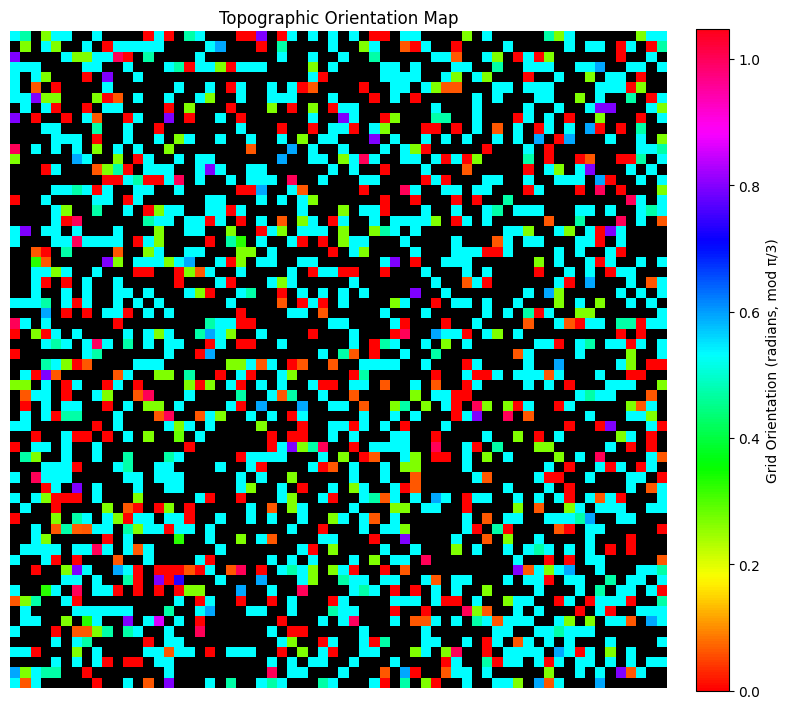

In [2]:
from analyze import create_topographic_orientation_map_figure

scale_map_fig = create_topographic_orientation_map_figure(ratemaps, grid_scores, mask_threshold=0.0, gscore_threshold=0.3)

plt.show()